# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator (click the file icon in the top left corner of the code editor and then click on any of the csv files to open them). How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [44]:
l = [pd.read_csv(file_name) for file_name in glob.glob('states*.csv')]
df = pd.concat(l)

In [45]:
any(df.duplicated())

False

In [3]:
df.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [16]:
df.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.


In [17]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M_543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,$46296.807763401106,2322409M_2455167F
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,$51805.40540540541,423477M_419713F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,$47328.083616587355,3167756M_3331859F
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,$55874.522600500095,13171316M_13367298F


Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column. Split the column into those two new columns using str.split and separating out those results. Convert both of the columns into numerical datatypes. There is still an M or an F character in each entry! We should remove those before we convert.



In [46]:
# Remove the '$' from the "Income" values and convert to numeric
df.Income = pd.to_numeric(df.Income.replace('[\$]','', regex=True))

# For columns such as "Hispanic", "White", etc.
# Remove the '%' from the values and convert to numeric
for column_name in df.columns[3:9]:
    df[column_name] = pd.to_numeric(df[column_name].replace('[\%]','',regex=True))

# retrive the Male and Female population data
df['GenderPop'] = df['GenderPop'].replace('[MF]','',regex=True).apply(lambda s: s.split('_'))
df['MalePop'] = pd.to_numeric(df['GenderPop'].apply(lambda l: l[0]))
df['FemalePop'] = pd.to_numeric(df['GenderPop'].apply(lambda l: l[1]))

In [47]:
df.drop(['GenderPop'], axis=1, inplace=True)

You want to double check your work. You know from experience that these monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [48]:
df['FemalePop'].fillna(df['TotalPop'] - df['MalePop'], inplace=True)

Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!Remember to call plt.show() to see the graph!

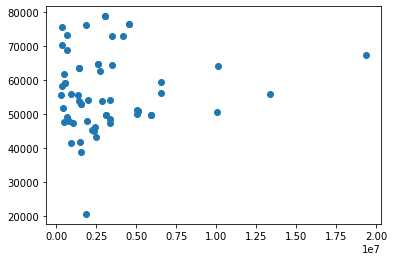

In [49]:
plt.scatter(df['FemalePop'], df['Income']) 
plt.show()

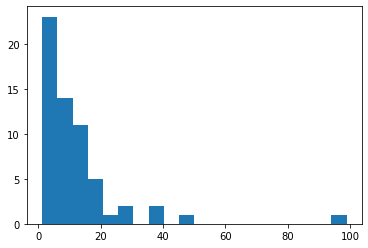

In [55]:
plt.hist(df['Hispanic'], 20)
plt.show()

In [63]:
df[['State','Hispanic']][df['Hispanic']>20]

,State,Hispanic
4,Texas,38.046738
3,Nevada,27.100884
4,Puerto Rico,98.893574
1,New Mexico,45.282932
0,Colorado,20.784380
4,Florida,21.338543
2,Arizona,29.565921
4,California,37.291875
5,Colorado,20.784380


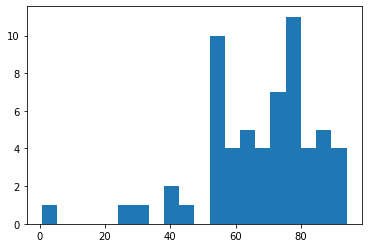

In [64]:
plt.hist(df['White'], 20)
plt.show()

In [65]:
df[['State','White']][df['White']<50]

,State,White
4,Texas,44.687909
4,Puerto Rico,0.773619
1,New Mexico,40.697992
1,Hawaii,25.032278
3,District of Columbia,33.103911
4,California,40.215789
